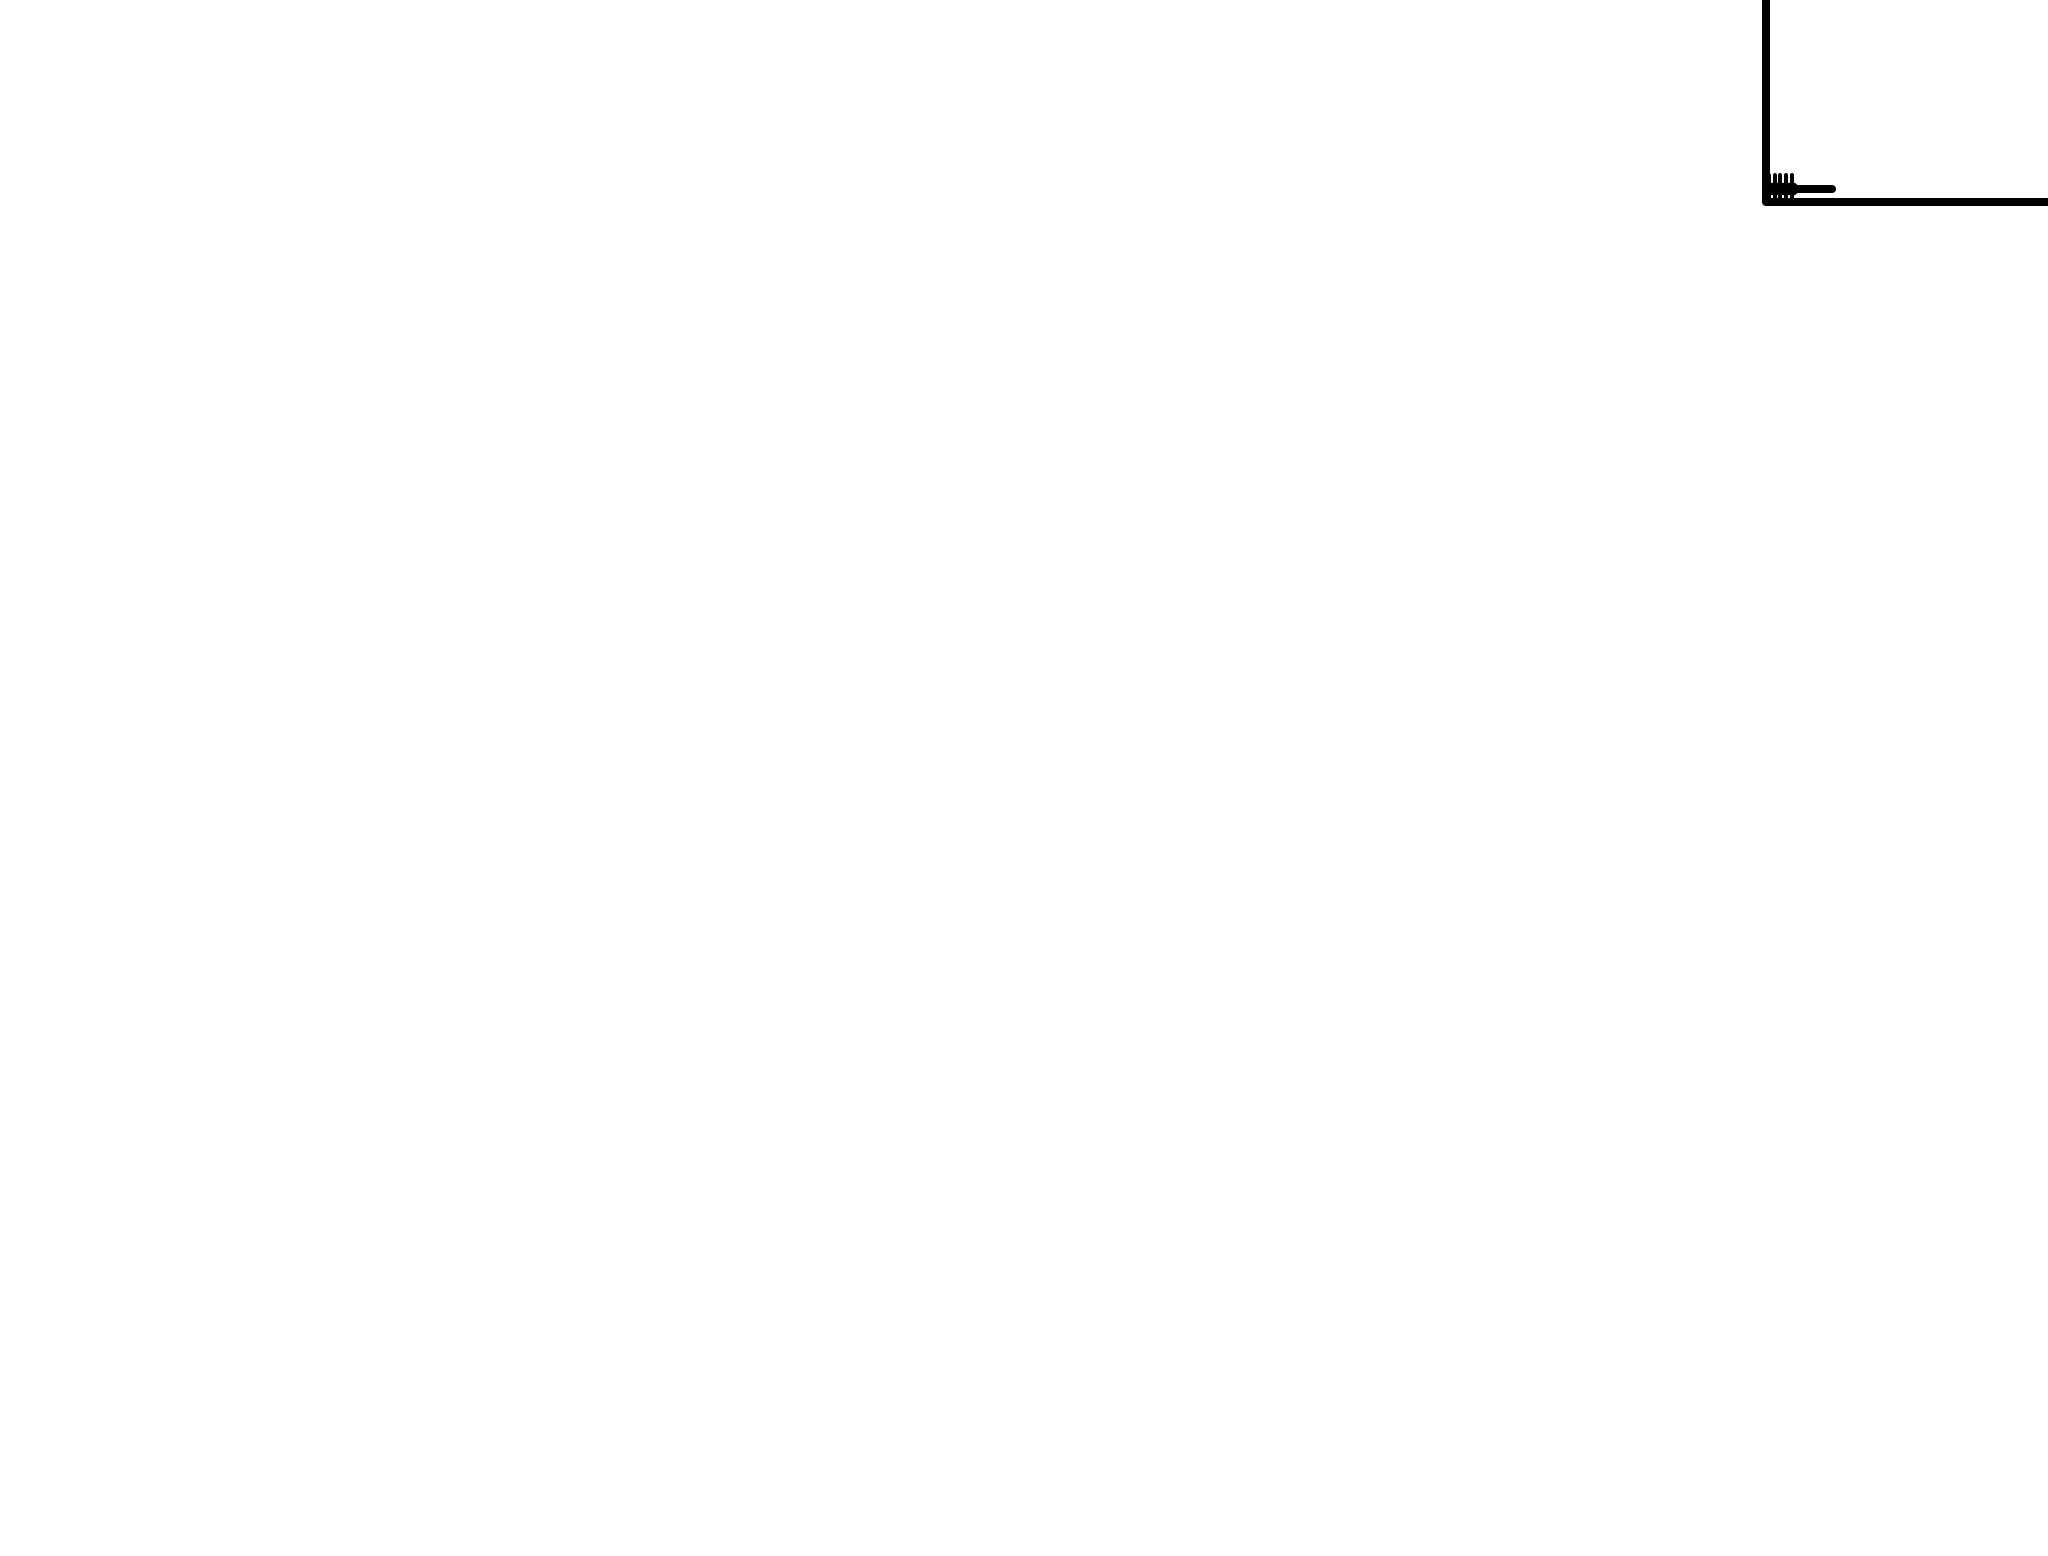

In [11]:
from xspec import *
import os
AllData.clear()
os.chdir('/home/suro/Desktop/github_repos/SIXTE')
os.chdir('data')
Plot.device = '/svg'
Xset.chatter = 0
data = Spectrum('combined_spec.pha')
Plot()